
<img src="../images/starwarsstartrek.png" style="float: center; margin: 0px; height: 150px; width: 500px"> 

## SUBREDDIT CLASSIFIER

###### _Author: Afolabi Cardoso_

---

### EDA and Pre-processing

---
#### Contents:
[Overview](#Overview) | [Imports](#Imports) | [Data Cleaning Training Set](#Data-Cleaning-Training-Set) | [Data Cleaning Test Set](#Data-Cleaning-Test-Set) | [Exports](#Exports)


---
#### Overview



---
#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [2]:
df = pd.read_csv('../data/clean.csv')
df = df[['title','selftext','created_utc','subreddit']]

In [3]:
df.head()

,title,selftext,created_utc,subreddit
0,Star wars game,,1646329318,starwars
1,If a Star Wars game about the famous wars in c...,,1646329234,starwars
2,What makes a Star Wars fan...a FAN?,,1646329180,starwars
3,What makes a Star Wars fan?,,1646328985,starwars
4,Random Clone Wars Thoughts,The series makes me appreciate Anakin so much ...,1646328915,starwars


## EDA

#### Top occuring words

Let's start by looking at the top occuring words in the tittle and selftext column.
To do this, I will CountVectorize.

I will use a CountVectorizer with stop_words as english and ngram_range of 1,1

In [4]:
cvec = CountVectorizer(stop_words='english', ngram_range = (1,1))

In [5]:
cvec.fit(df['title'])

CountVectorizer(stop_words='english')

In [6]:
X = cvec.transform(df['title'])

In [7]:
X.shape

(2000, 3986)

In [8]:
cvec_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

In [9]:
cvec_df.head()

,000,001,002,01,04x02,061,10,100,1000,102,...,zero,ziegfeld,zimmer,zine,ziro,zoe,zoomable,zoomers,zora,имчисм
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Top 10 occuring words
What are the 10 most common words in the corpus 

In [10]:
top_ten_starwars = cvec_df[:999].sum().sort_values(ascending=False)[:15] #top ten in starwars subreddit
top_ten_startrek = cvec_df[1000:2000].sum().sort_values(ascending=False)[:15]  #top ten in startrek subreddit
top_ten_both = cvec_df[1000:2000].sum().sort_values(ascending=False)[:15]  #top ten in both

Bar graph showing top 10 words

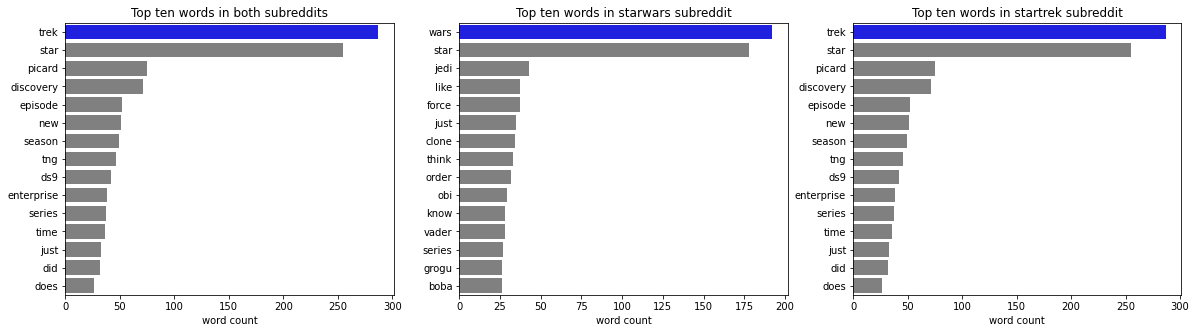

In [13]:
#create two axis 
fig ,ax = plt.subplots(1,3,figsize = (20,5))

#set color for largest bar
colr = ['grey' if (x<max(top_ten_both)) else 'blue' for x in top_ten_both]

#starwars bar chart
sns.barplot(ax = ax[0], x = top_ten_both, y = top_ten_both.index ,palette = colr)

#starwars bar chart
sns.barplot(ax = ax[1], x = top_ten_starwars, y = top_ten_starwars.index ,palette = colr)

#starwars bar chart
sns.barplot(ax = ax[2], x = top_ten_startrek, y = top_ten_startrek.index ,palette = colr)

#set labels
ax[0].set(xlabel = 'word count'), ax[1].set(xlabel = 'word count'), ax[2].set(xlabel = 'word count')
ax[0].set_title('Top ten words in both subreddits')
ax[1].set_title('Top ten words in starwars subreddit')
ax[2].set_title('Top ten words in startrek subreddit');

#### Sentiment analyser


Sentiment analysis is a method by which we try to determine the polarity of a statment. In this case, we will use sentiment analysis to compare the two subreddits. I am curious to see which group of fans have more positive opinions.

From the VADAR NLTK library, I will use the SentimentIntensityAnalyzer() method. This method takes in a string and returns a dictionary containing, a positive, neutral, negative and compound value. We will be using the compund score to perform our analysis.

In [14]:
#Instantiate the analyser
sia = SentimentIntensityAnalyzer()

In [15]:
#create a new column for the mood
df['mood'] = df['title'].map(lambda x: sia.polarity_scores(x)['compound'])

In [16]:
df_starwars = df[df['subreddit'] == 'starwars']
df_startrek = df[df['subreddit'] == 'startrek']

Let's plot the distribution of the mood for both 

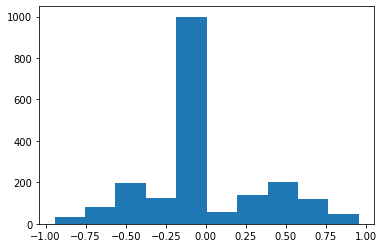

In [20]:
# df_startrek['mood'].hist()
# df_starwars['mood'].hist()

plt.hist(df['mood'], label='subreddit');

In [222]:
df_starwars[['title','mood',]]

,title,mood
0,Star wars game,-0.5574
1,If a Star Wars game about the famous wars in c...,-0.8020
2,What makes a Star Wars fan...a FAN?,-0.1449
3,What makes a Star Wars fan?,-0.3182
4,Random Clone Wars Thoughts,-0.5574
...,...,...
995,Inspire by an earlier post,0.5719
996,Early Ralph McQuarrie concept art for the Empe...,0.0000
997,My new decoration in living room. :),0.4588
998,"""Twice the Pride, double the fall!"" - Count Do...",0.6239


## Pre processing


Fot the pre processing, we will start by removing punctuations. I will use regex and pandas str.replace method

In [223]:
df['title'] = df['title'].str.replace('[^\w\s]','')

/var/folders/db/yz8g3qx147g7dfn7_8w2pxl80000gn/T/ipykernel_92446/2270917832.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('[^\w\s]','')


In [224]:
df['title']

0                                          Star wars game
1       If a Star Wars game about the famous wars in c...
2                         What makes a Star Wars fana FAN
3                              What makes a Star Wars fan
4                              Random Clone Wars Thoughts
                              ...                        
1995      I have finally watched DS9 from start to finish
1996                                           TOS script
1997    How did you get into Trek What series was your...
1998    If youve never seen this this is the prototype...
1999    The Ready Room All In Sonequa MartinGreen amp ...
Name: title, Length: 2000, dtype: object

## Export

Export the cleaned dataframe as clean.csv

In [225]:
df.to_csv('../data/preprocessed.csv', index=False)